In [1]:
cnfl=[false]
include("PVCR.jl");

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1186
┌ Warning: Module Conda with build ID 38462504167046 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: Module Conda with build ID 38462504167046 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1186
┌ Warning: Module Conda with build ID 38462504167046 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(

# Residential Cases

Residential consumers use an internal rate of 0%, but they don't include in the NPV calculation the downpayment and think about as a sunk cost. They also use an stable 600 colones/dolar exchange rate for the whole period of analysis. 

In [2]:
consumption = 100:50:400
capacity = 0.0:0.5:10

results = Array{Float64,2}(undef, length(consumption), length(capacity))
neg_pv = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    ice_residential.econsumption = co; get_pmax(ice_residential);
    for (jx, ca) in enumerate(capacity)
        PVRes.capacity = ca
        cashflow = PV_cashflow(ice_residential, PVRes, BAC1, tariff_increase = true)
        results[ix,jx] = mean(cashflow)  
        annuities = sum(cashflow,dims=1)
        neg_pv[ix,jx] = sum(annuities[1:5])     
    end
end

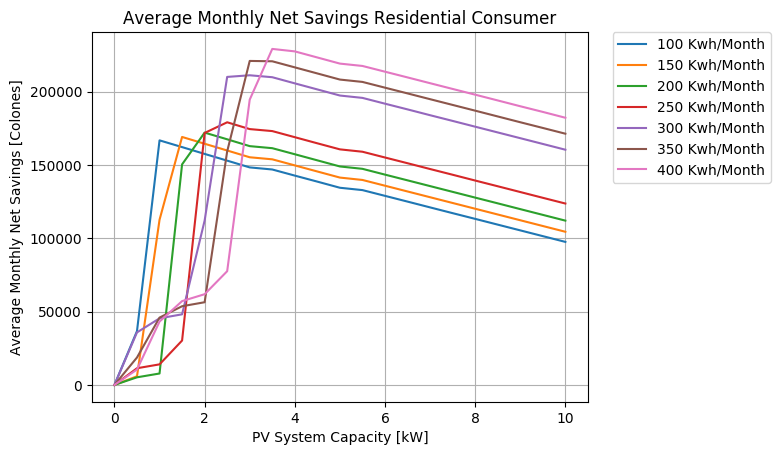

In [3]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),results[ix,:], label = "$(co) Kwh/Month")
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("Average Monthly Net Savings [Colones]")
grid("on");
title("Average Monthly Net Savings Residential Consumer");

It is hard to tell here, but there is economic gains within the first 5 years for consumers starting un 300 kWh

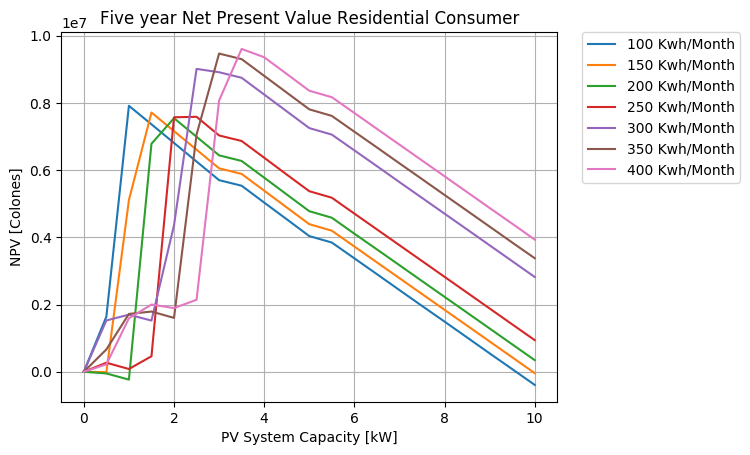

In [4]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),neg_pv[ix,:], label = "$(co) Kwh/Month")
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV [Colones]")
grid("on");
title("Five year Net Present Value Residential Consumer");

In [5]:
consumption = 500:100:1500
capacity = 0.0:0.5:15

neg_pv = Array{Float64,2}(undef, length(consumption), length(capacity))
results = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    ice_residential.econsumption = co; get_pmax(ice_residential);
    for (jx, ca) in enumerate(capacity)
        PVRes.capacity = ca
        cashflow = PV_cashflow(ice_residential, PVRes, BAC1, tariff_increase = true)
        results[ix,jx] = mean(cashflow)  
        annuities = sum(cashflow,dims=1)
        neg_pv[ix,jx] = sum(annuities[1:5])     
    end
end

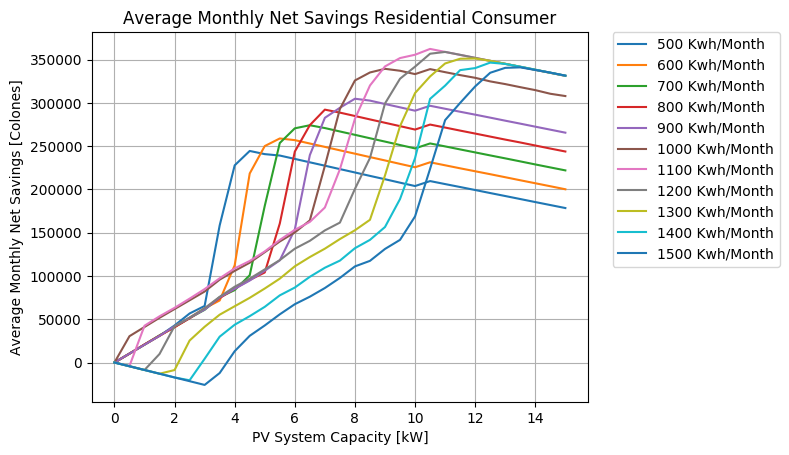

In [6]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),results[ix,:], label = "$(co) Kwh/Month")
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("Average Monthly Net Savings [Colones]")
grid("on");
title("Average Monthly Net Savings Residential Consumer");

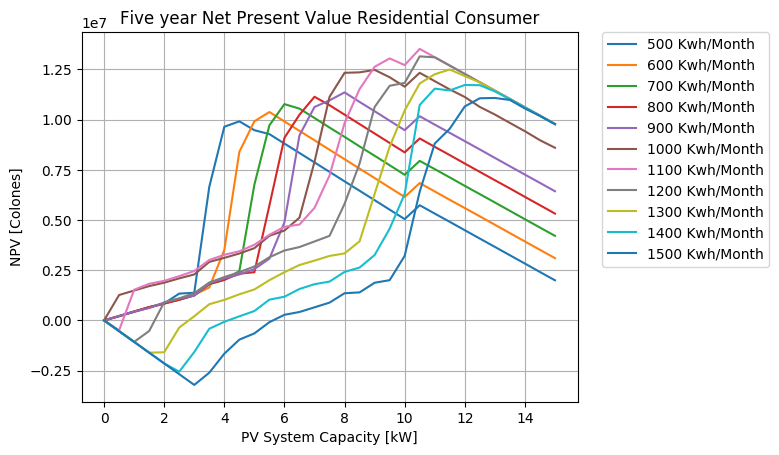

In [7]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),neg_pv[ix,:], label = "$(co) Kwh/Month")
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV [Colones]")
grid("on");
title("Five year Net Present Value Residential Consumer");

In [8]:
consumption = 1500:500:6000
capacity = 0.0:0.5:40

results = Array{Float64,2}(undef, length(consumption), length(capacity))

neg_pv = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    ice_residential.econsumption = co; get_pmax(ice_residential);
    for (jx, ca) in enumerate(capacity)
        PVRes.capacity = ca
        cashflow = PV_cashflow(ice_residential, PVRes, BAC1, tariff_increase = true)
        results[ix,jx] = mean(cashflow)  
        annuities = sum(cashflow,dims=1)
        neg_pv[ix,jx] = sum(annuities[1:5])     
    end
end

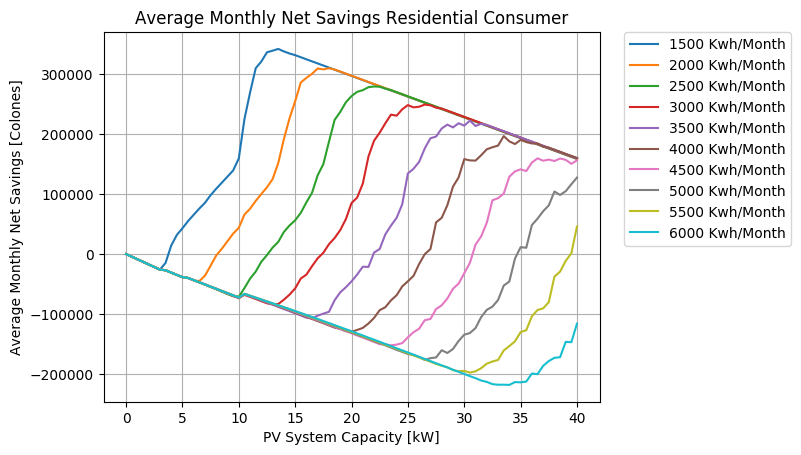

In [9]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),results[ix,:], label = "$(co) Kwh/Month")
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("Average Monthly Net Savings [Colones]")
grid("on");
title("Average Monthly Net Savings Residential Consumer");

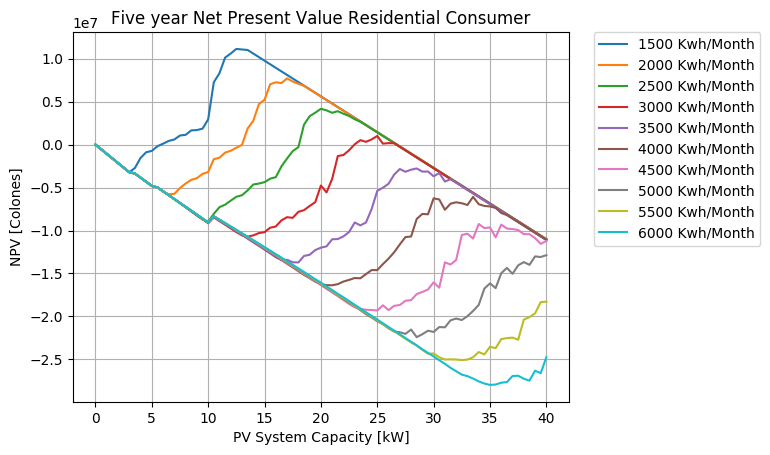

In [10]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),neg_pv[ix,:], label = "$(co) Kwh/Month")
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV [Colones]")
grid("on");
title("Five year Net Present Value Residential Consumer");

# Commercial Industrial Cases
They include the downpayment in their estimation and discount at an internal rate of 6%. They also use an stable 600 colones/dolar exchange rate for the whole period of analysis. 

In [11]:
consumption = 500:500:3000
capacity = 0.0:1:60
pv = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    ice_commercial.econsumption = co; get_pmax(ice_commercial);
    for (jx, ca) in enumerate(capacity)
    PVComInd.capacity = ca
    cashflow = PV_cashflow(ice_commercial, PVComInd, BAC1, tariff_increase = true)
       annuities = sum(cashflow,dims=1)
        pv[ix,jx] = npv(annuities, ice_commercial.rate_return)
    end
end

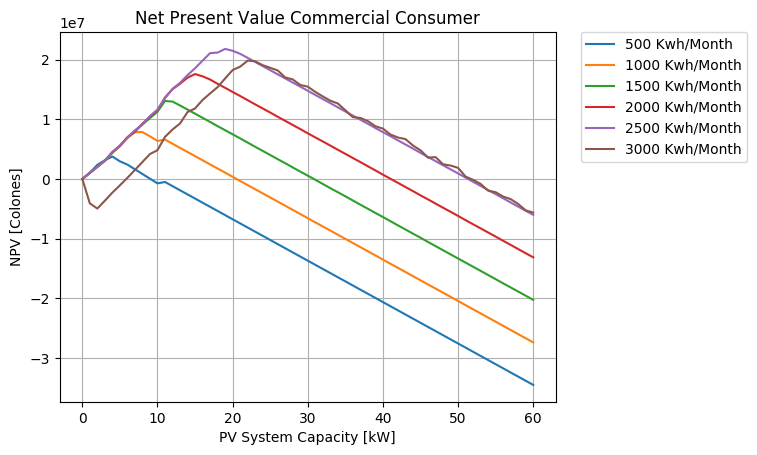

In [12]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),pv[ix,:], label = "$(co) Kwh/Month")
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV [Colones]")
grid("on");
title("Net Present Value Commercial Consumer");

In [13]:
consumption = 2800:500:6000
capacity = 0:1:80

pv = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    ice_commercial.econsumption = co; get_pmax(ice_commercial);
    for (jx, ca) in enumerate(capacity)
    PVComInd.capacity = ca
    cashflow = PV_cashflow(ice_commercial, PVComInd, BAC1, tariff_increase = true)
       annuities = sum(cashflow,dims=1)
        pv[ix,jx] = npv(annuities, ice_commercial.rate_return)
    end
end

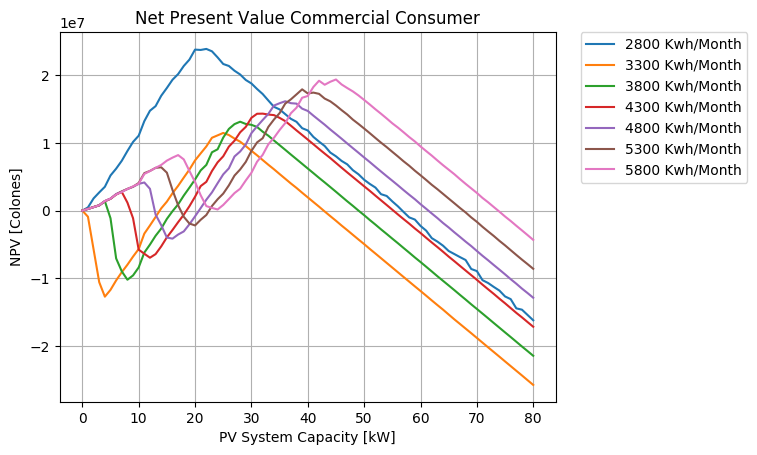

In [14]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),pv[ix,:], label = "$(co) Kwh/Month")
end

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV [Colones]")
grid("on");
title("Net Present Value Commercial Consumer");

In [15]:
consumption = 6000:500:11000
capacity = 0.0:5.0:220

pv = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    ice_commercial.econsumption = co; get_pmax(ice_commercial);
    for (jx, ca) in enumerate(capacity)
    PVComInd.capacity = ca
    cashflow = PV_cashflow(ice_commercial, PVComInd, BAC1, tariff_increase = true)
       annuities = sum(cashflow,dims=1)
        pv[ix,jx] = npv(annuities, ice_commercial.rate_return)
    end
end

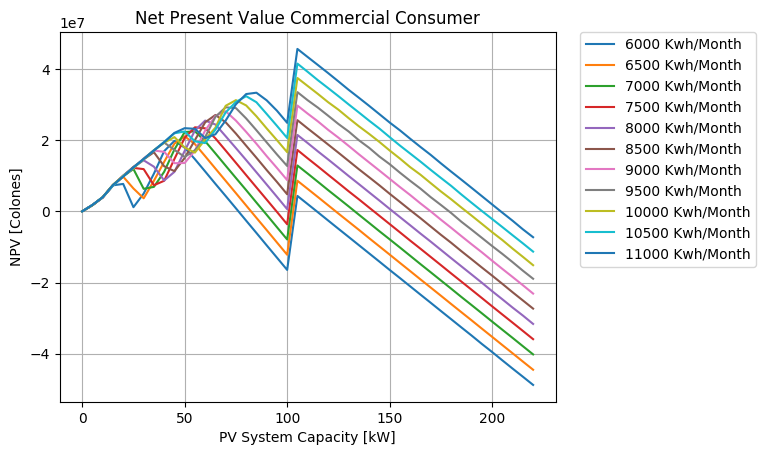

In [16]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),pv[ix,:], label = "$(co) Kwh/Month")
end

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV [Colones]")
grid("on");
title("Net Present Value Commercial Consumer");

Cases with consumption over 10,000 kWH are difficult to asses. According to the requirements, a user with over 10,000 kWH month on average should be moved to Medium Voltage Tariff. In this assessment we assume that the user will prefer the installation below 100 kW

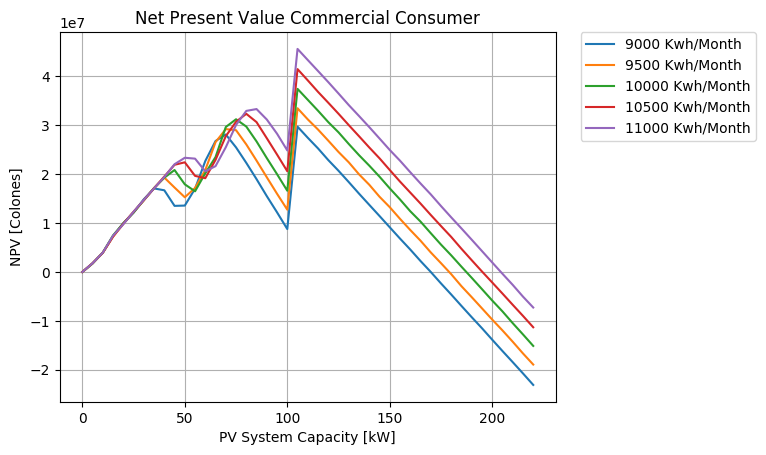

In [17]:
for (ix, co) in enumerate(consumption[7:end])
    plot(collect(capacity),pv[ix+6,:], label = "$(co) Kwh/Month")
end

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV [Colones]")
grid("on");
title("Net Present Value Commercial Consumer");

# Medium Voltage Cases
They include the downpayment in their estimation and discount at an internal rate of 6%. They also use an stable 600 colones/dolar exchange rate for the whole period of analysis. 

In [18]:
consumption = 10000:10000:100000
capacity = 0:10:1000

pv = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    ice_mediumvoltage.econsumption = co; get_pmax(ice_mediumvoltage);
    for (jx, ca) in enumerate(capacity)
        PVTMT.capacity = ca
        cashflow = PV_cashflow(ice_mediumvoltage, PVTMT, BAC1, tariff_increase = true)
        annuities = sum(cashflow,dims=1)
        pv[ix,jx] = npv(annuities, ice_mediumvoltage.rate_return)
    end
end

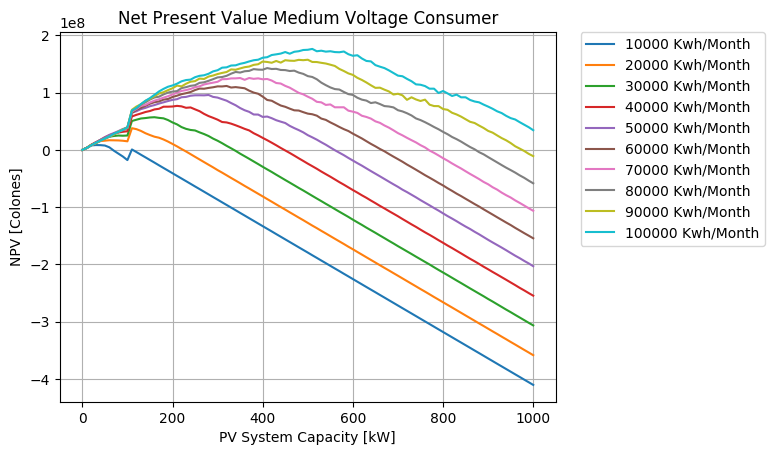

In [19]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),pv[ix,:], label = "$(co) Kwh/Month")
end

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV [Colones]")
grid("on");
title("Net Present Value Medium Voltage Consumer");